<a href="https://colab.research.google.com/github/shouryam01/Heart-Disease_predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [ ]:
df = pd.read_csv('./heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.isnull().values.any()

np.False_

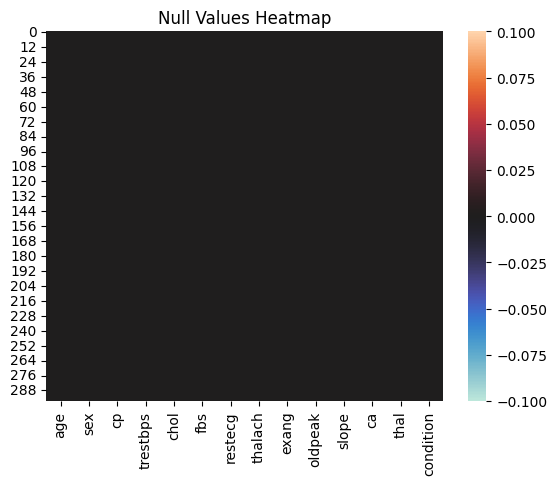

In [ ]:
sns.heatmap(df.isnull(), cmap='icefire')
plt.title("Null Values Heatmap")
plt.show()

In [ ]:
# Let's find out the unique values in the dataset
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,50
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
# Let's see the target variable i.e-> Condition
df['condition'].value_counts()

,count
condition,
0,160
1,137


In [ ]:
# Determine the Percentage of the People who are having Heart disease
df['condition'].value_counts()/df.shape[0] * 100

,count
condition,
0,53.872054
1,46.127946


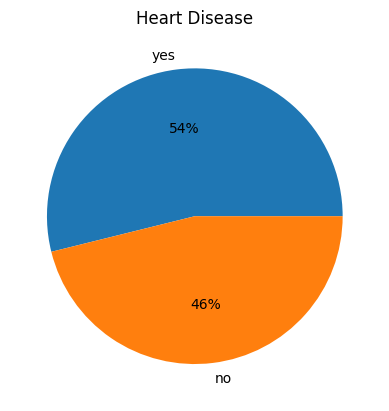

In [ ]:
# Let's Visualize this data:
labels = ['yes', 'no']
values = df['condition'].value_counts().values

plt.pie(values, labels = labels, autopct="%1.0f%%")
plt.title("Heart Disease")
plt.show()

<ipython-input-12-d5d4acc0c8e3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, label='Age')
<ipython-input-12-d5d4acc0c8e3>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], color="red",  kde= True,label='Blood Pressure')
<ipython-input-12-d5d4acc0c8e3>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

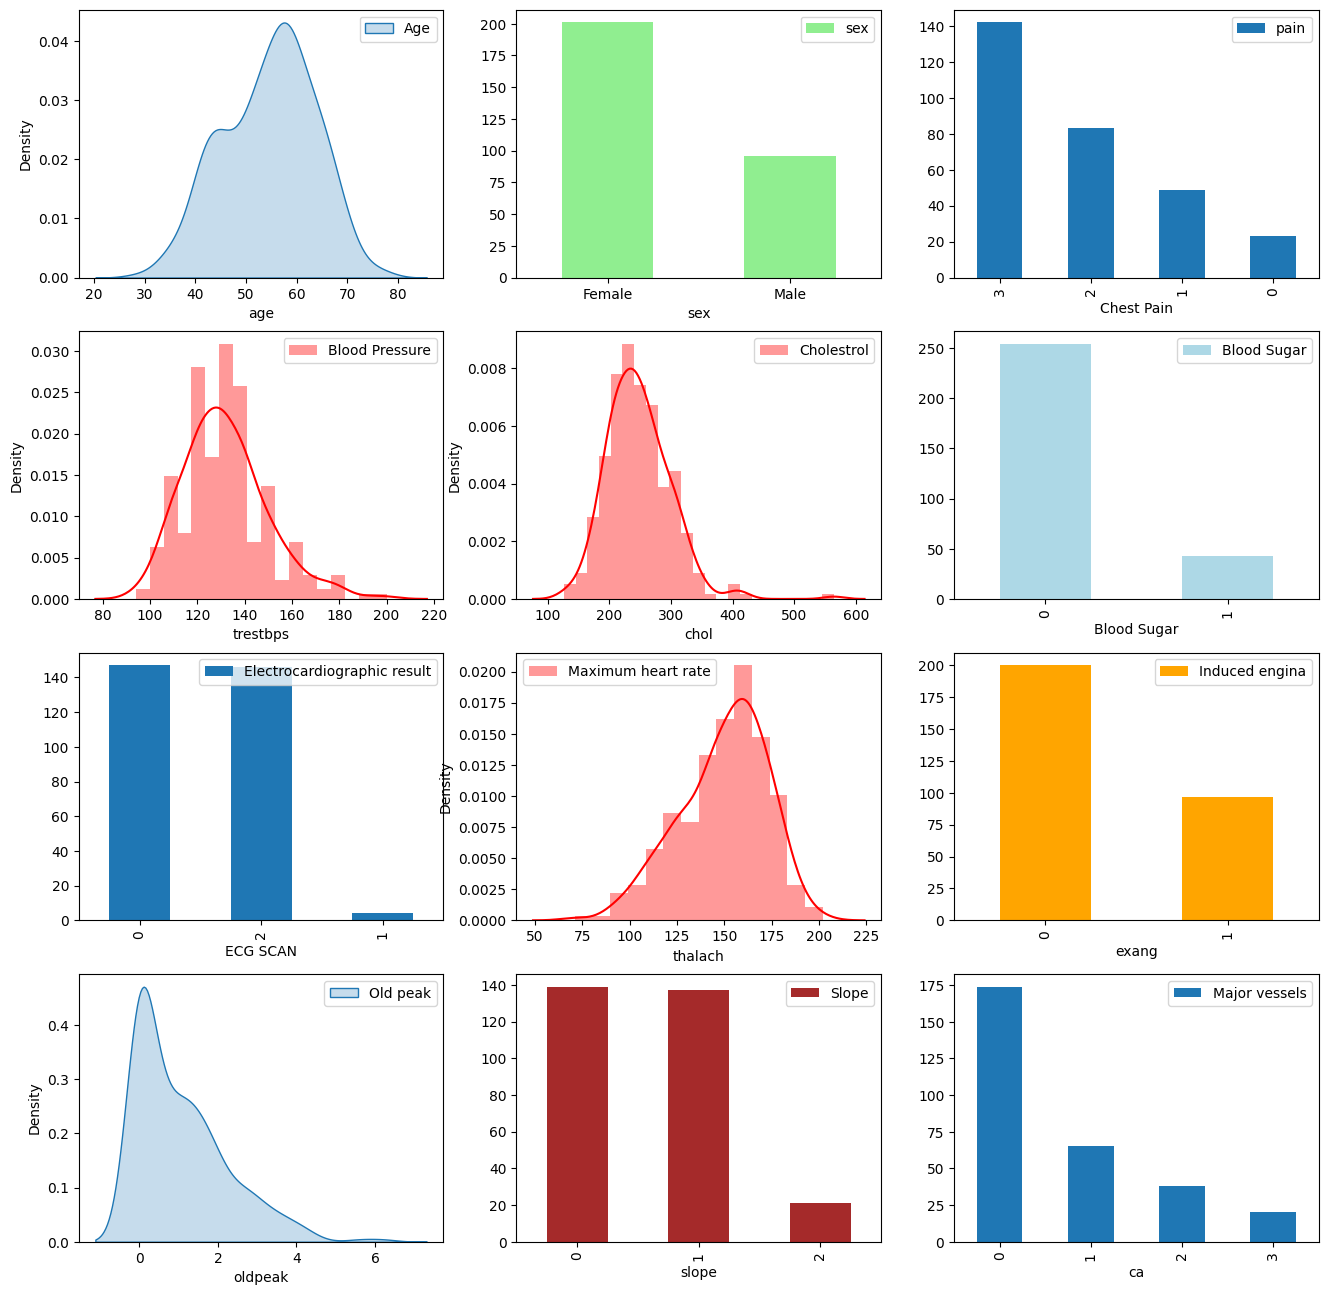

In [ ]:
# By obvserving the above data - We can see the data is imbalanced:
# Let's see the Districution of Features:
fig = plt.figure(figsize=(16,16))
fig = plt.subplot(431)
sns.kdeplot(df['age'], shade=True, label='Age')
# plt.title("Distribution of Age")
plt.legend()

fig = plt.subplot(432)
df['sex'].value_counts().plot(kind='bar', label='sex', color='lightgreen')
plt.xlabel('sex')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
# plt.title("Distribution of Sex")
plt.legend()

fig = plt.subplot(433)
df['cp'].value_counts().plot(kind='bar', label='pain')
plt.xlabel('Chest Pain')
# plt.title("Distribution of Chest Pain")
plt.legend()

fig = plt.subplot(434)
sns.distplot(df['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title("Distribution of Blood Pressure")
plt.legend()

fig = plt.subplot(435)
sns.distplot(df['chol'], color="red",  kde= True,label='Cholestrol')
# plt.title("Distribution of Cholestrol")
plt.legend()

fig = plt.subplot(436)
df['fbs'].value_counts().plot(kind='bar', label='Blood Sugar', color="lightblue")
plt.xlabel('Blood Sugar')
# plt.title("Distribution of Blood Sugar")
plt.legend()

fig = plt.subplot(437)
df['restecg'].value_counts().plot(kind='bar', label='Electrocardiographic result')
plt.xlabel('ECG SCAN')
# plt.title("Distribution of Electrocardiographic result")
plt.legend()

fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(df['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()

fig = plt.subplot(439)
df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()

fig = plt.subplot(4,3,10)
sns.kdeplot(df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

<ipython-input-13-b2a0897f5444>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['condition'] == 0]['age'], color='green', label='No heart Disease')
<ipython-input-13-b2a0897f5444>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['condition'] == 1]['age'], color='Red', label='Has hea

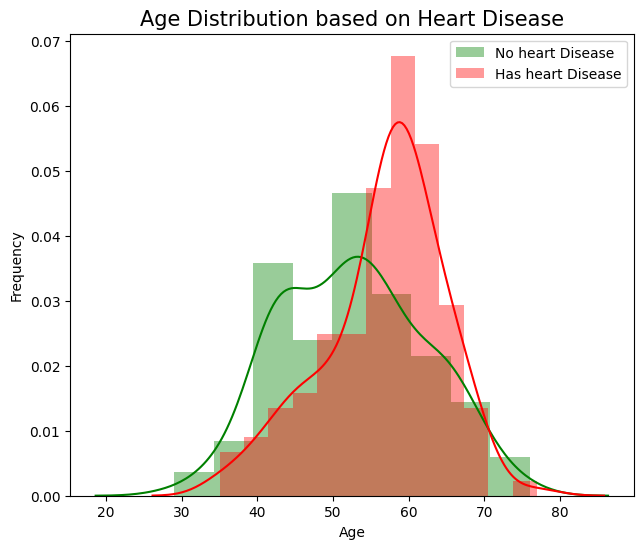

In [ ]:
# Distribution of Features With Respect to Target

fig = plt.figure(figsize=(16, 6))
fig = plt.subplot(121)
sns.distplot(df[df['condition'] == 0]['age'], color='green', label='No heart Disease')
sns.distplot(df[df['condition'] == 1]['age'], color='Red', label='Has heart Disease')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age Distribution based on Heart Disease', fontsize=15)
plt.legend()
plt.show()

In [ ]:
# Getting the Average Ages of people that are having Heart Disease:
print('Minimum Average age of the people having heart disease ->', min(df[df['condition'] == 1]['age']))
print('Maximum Average age of the people having heart disease ->', max(df[df['condition'] == 1]['age']))
print('Average Age of the people having heart disease ->', df[df['condition'] == 1]['age'].mean())


Minimum Average age of the people having heart disease -> 35
Maximum Average age of the people having heart disease -> 77
Average Age of the people having heart disease -> 56.75912408759124


In [ ]:
# Getting the Average Ages of people that are not having Heart Disease:
print('Minimum Average age of the people not having heart disease ->', min(df[df['condition'] == 0]['age']))
print('Maximum Average age of the people not having heart disease ->', max(df[df['condition'] == 0]['age']))
print('Average Age of the people not having heart disease ->', df[df['condition'] == 0]['age'].mean())

Minimum Average age of the people not having heart disease -> 29
Maximum Average age of the people not having heart disease -> 76
Average Age of the people not having heart disease -> 52.64375


<ipython-input-16-5897f217ce62>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['condition'] == 0]['trestbps'], label='Do not have a Heart Disease', ax = axis1)
<ipython-input-16-5897f217ce62>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['condition'] == 1]['trestbps'],

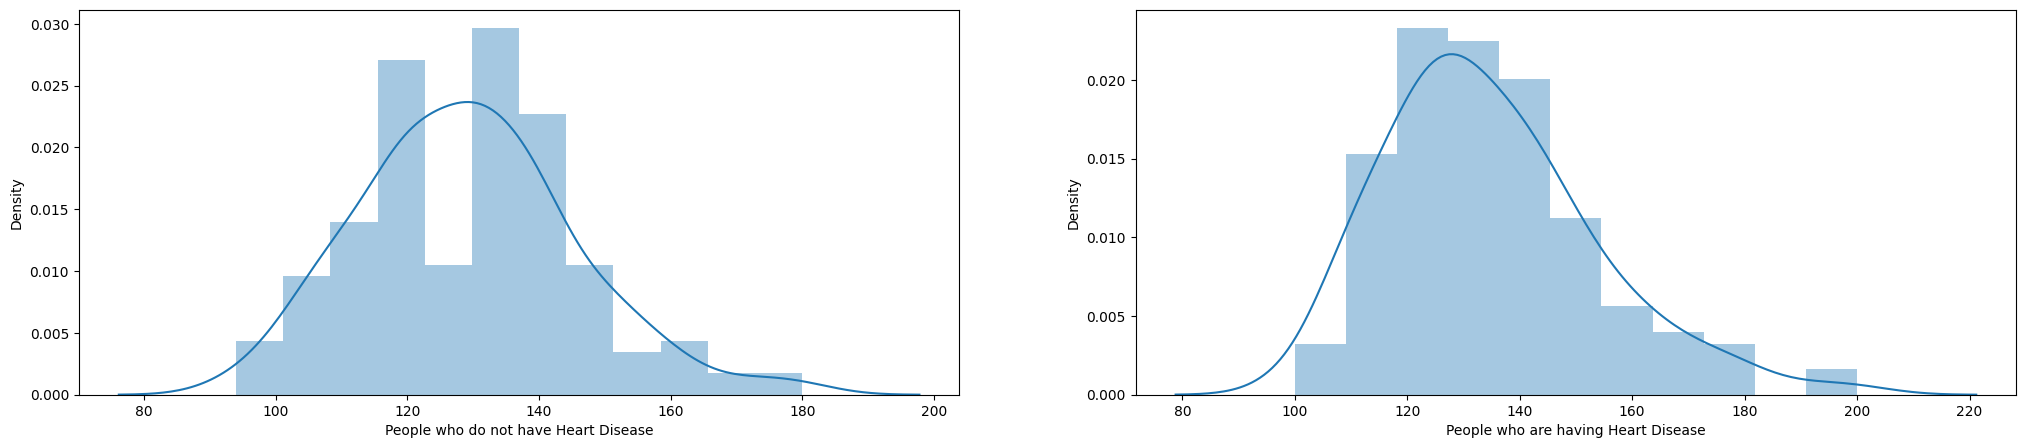

In [ ]:
# Blood Pressure Distribution based on Heart Rate

fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['condition'] == 0]['trestbps'], label='Do not have a Heart Disease', ax = axis1)
ax.set(xlabel="People who do not have Heart Disease")
ax = sns.distplot(df[df['condition'] == 1]['trestbps'], label='Having a Heart Disease', ax = axis2)
ax.set(xlabel="People who are having Heart Disease")
plt.show()

In [ ]:
# Getting the Average BP of people that are not having Heart Disease:
print('Minimum Average Blood Pressure of the people not having heart disease ->', min(df[df['condition'] == 0]['trestbps']))
print('Maximum Average Blood Pressure of the people not having heart disease ->', max(df[df['condition'] == 0]['trestbps']))
print('Average Blood Pressure of the people not having heart disease ->', df[df['condition'] == 0]['trestbps'].mean())

Minimum Average Blood Pressure of the people not having heart disease -> 94
Maximum Average Blood Pressure of the people not having heart disease -> 180
Average Blood Pressure of the people not having heart disease -> 129.175


In [ ]:
# Getting the Average BP of people that are having Heart Disease:
print('Minimum Average Blood Pressure of the people having heart disease ->', min(df[df['condition'] == 1]['trestbps']))
print('Maximum Average Blood Pressure of the people having heart disease ->', max(df[df['condition'] == 1]['trestbps']))
print('Average Blood Pressure of the people having heart disease ->', df[df['condition'] == 1]['trestbps'].mean())

Minimum Average Blood Pressure of the people having heart disease -> 100
Maximum Average Blood Pressure of the people having heart disease -> 200
Average Blood Pressure of the people having heart disease -> 134.63503649635035


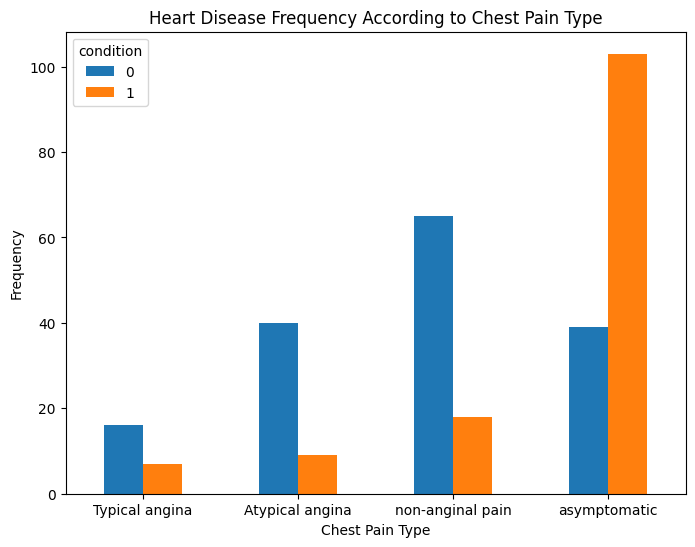

In [ ]:
# Heart Disease Frequency according to Chest Pain Type:
pd.crosstab(df.cp, df.condition).plot(kind="bar", figsize=(8, 6))
plt.title("Heart Disease Frequency According to Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(np.arange(4), ('Typical angina', 'Atypical angina', 'non-anginal pain', 'asymptomatic'), rotation=0)
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-064a3972d5e5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['condition'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
<ipython-input-20-064a3972d5e5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['condition'] == 1]['chol'], label = '

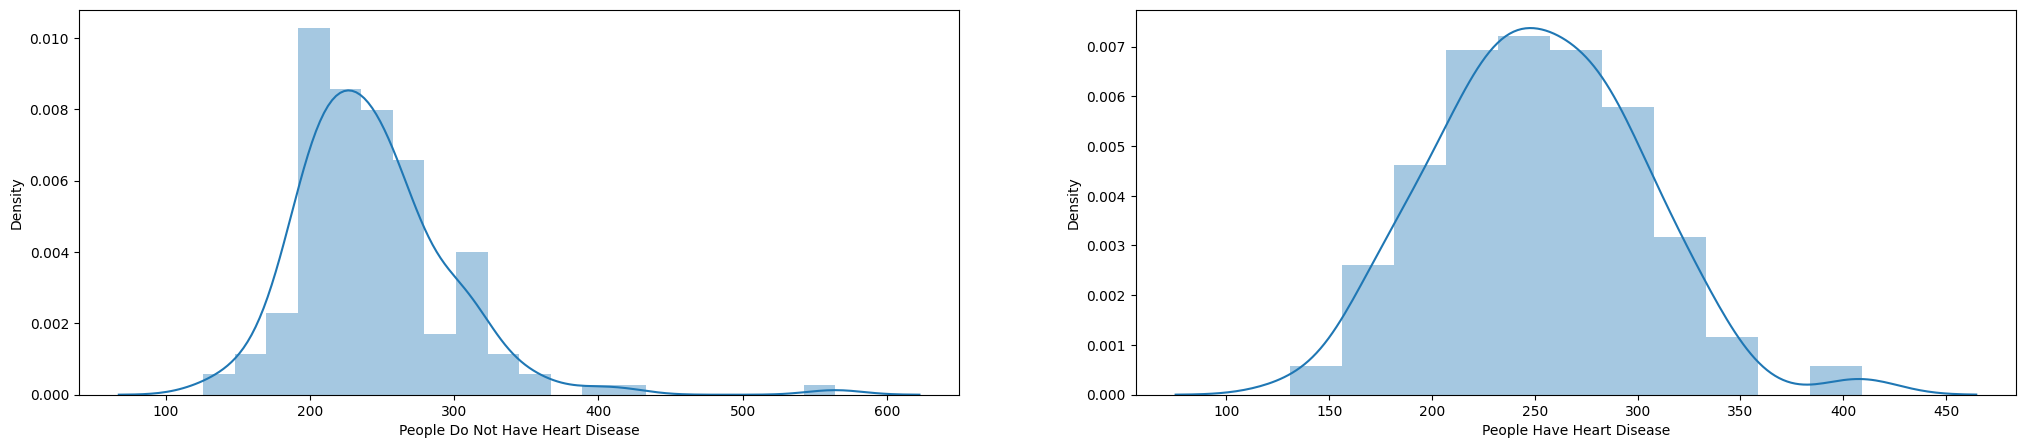

In [ ]:
# Cholestrol Distribution on Heart Disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['condition'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['condition'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:

# Get min, max and average of the Cholestoral of the people do not have heart disease
print('Min cholestrol of people who do not have heart disease: ', min(df[df['condition'] == 0]['chol']))
print('Max cholestrol of people who do not have heart disease: ', max(df[df['condition'] == 0]['chol']))
print('Average cholestrol of people who do not have heart disease: ', df[df['condition'] == 0]['chol'].mean())

Min cholestrol of people who do not have heart disease:  126
Max cholestrol of people who do not have heart disease:  564
Average cholestrol of people who do not have heart disease:  243.49375


In [ ]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestrol of people who have heart disease: ', min(df[df['condition'] == 1]['chol']))
print('Max cholestrol of people who have heart disease: ', max(df[df['condition'] == 1]['chol']))
print('Average cholestrol of people who have heart disease: ', df[df['condition'] == 1]['chol'].mean())

Min cholestrol of people who have heart disease:  131
Max cholestrol of people who have heart disease:  409
Average cholestrol of people who have heart disease:  251.85401459854015


<Axes: >

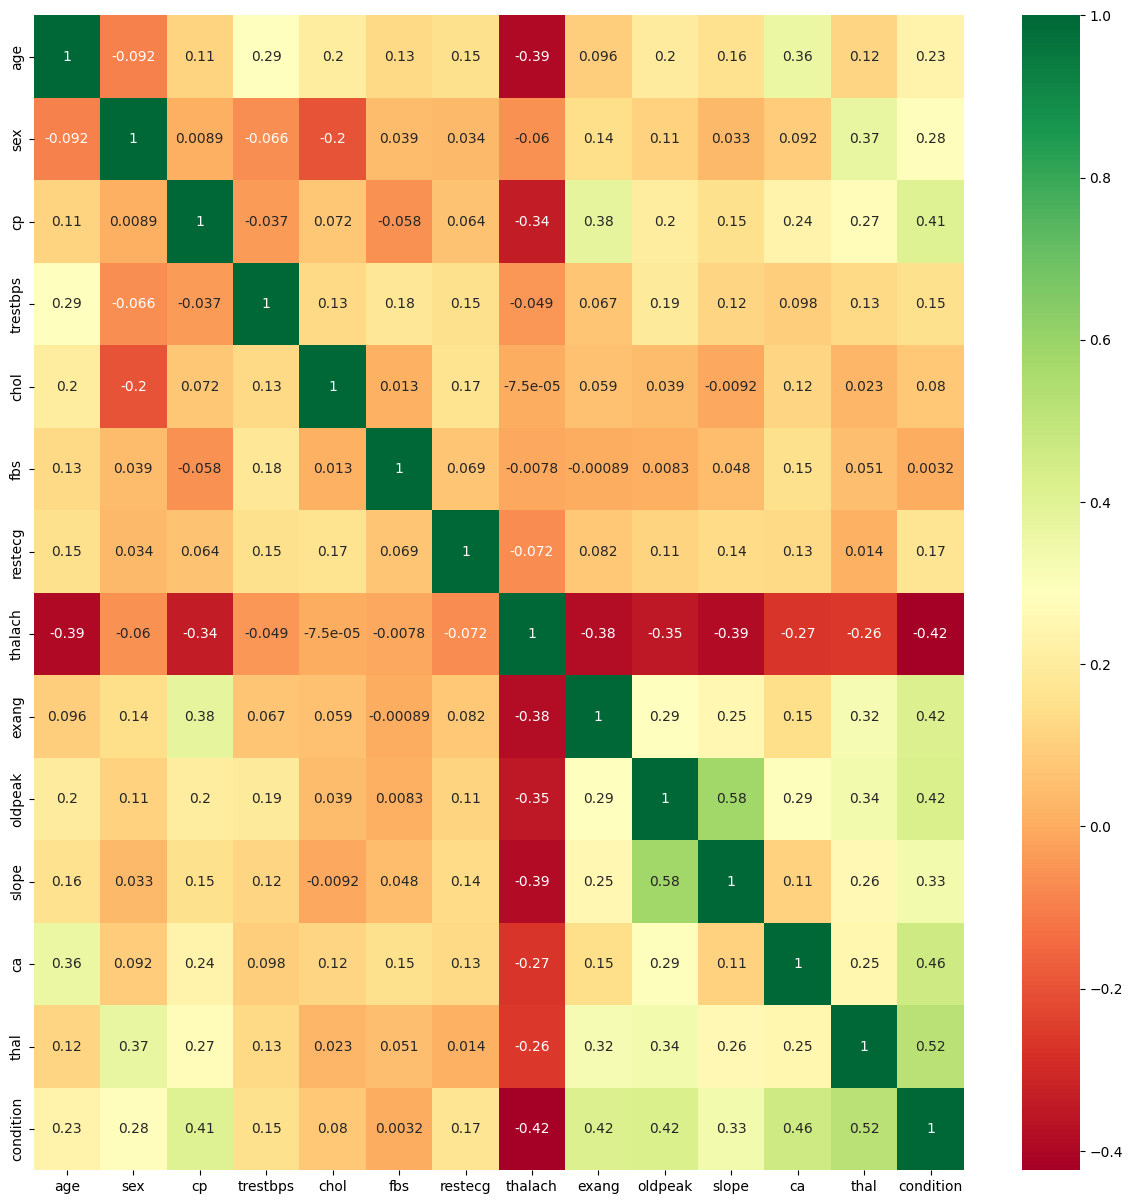

In [ ]:
# Now select the Features: FEATURE SELECTION-->
corr_matrix = df.corr()
top_corr_featuresx = corr_matrix.index
plt.figure(figsize=(15, 15))
sns.heatmap(data=df[top_corr_featuresx].corr(), annot=True, cmap='RdYlGn')

In [ ]:
x = df.drop(columns='condition')
y = df.condition
# Splitting the dataset into training and Testing Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print('X_train_size: {}, X_test_size: {}'.format(x_train.shape, x_test.shape))\
# 25% for Testing and Rest for Training Data

X_train_size: (222, 13), X_test_size: (75, 13)


In [ ]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)


In [ ]:
# Logistic Regression Model
LR_model = LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR = LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler, y_test)

print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

cm = confusion_matrix(y_test, y_pred_LR)
cm



Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.77      0.73      0.75        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75

Accuracy: 76.0%



array([[30,  8],
       [10, 27]])

In [ ]:
model_filename = 'logistic_regression.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(LR_model, file)

In [ ]:
# K-Nearest-Neighbor Classifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_model.fit(x_train_scaler, y_train)
y_pred_knn = knn_model.predict(x_test_scaler)
knn_model.score(x_test_scaler, y_test)

print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

cm = confusion_matrix(y_test, y_pred_knn)
cm


Classification Report
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.75      0.73      0.74        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75

Accuracy: 74.67%



array([[29,  9],
       [10, 27]])

In [ ]:
model_filename = 'K-Nearest_Neighbor.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(knn_model, file)

In [ ]:
# Support Vector Classifier
Svc_model = SVC()
Svc_model.fit(x_train_scaler, y_train)
y_pred_svc = Svc_model.predict(x_test_scaler)
Svc_model.score(x_test_scaler, y_test)

print('Classification Report\n', classification_report(y_test, y_pred_svc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_svc)*100),2)))

cm = confusion_matrix(y_test, y_pred_svc)
cm

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.78      0.78      0.78        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75

Accuracy: 78.67%



array([[30,  8],
       [ 8, 29]])

In [ ]:
model_filename = 'SVM.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(Svc_model, file)

In [ ]:
# Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators=19)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF = RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler, y_test)

print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

cm = confusion_matrix(y_test, y_pred_RF)
cm

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.78      0.76      0.77        37

    accuracy                           0.77        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.77      0.77      0.77        75

Accuracy: 77.33%



array([[30,  8],
       [ 9, 28]])

In [ ]:
model_filename = 'Random-Forest.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(RF_model, file)

In [ ]:
# Decision Tree Classifier
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

cm = confusion_matrix(y_test, y_pred_DT)
cm

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        38
           1       0.71      0.78      0.74        37

    accuracy                           0.73        75
   macro avg       0.74      0.73      0.73        75
weighted avg       0.74      0.73      0.73        75

Accuracy: 73.33%



array([[26, 12],
       [ 8, 29]])

In [ ]:
model_filename = 'Decisiontree.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(DT_model, file)